In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
data = pd.read_csv("/content/Data Analysis Task.csv")

In [5]:
# Calculate the overall distribution of responses for Question 1
overall_response_distribution = data['우티 앱을 사용하는 주요 이유 3가지는 무엇인가요?'].value_counts(normalize=True) * 100
overall_response_distribution

사용하기 편리한 앱 (간편한 호출 절차, 경유지 추가 기능 등), 요금 할인 혜택, 가맹 및 비가맹 기사 상관없이 가까운 순서대로 호출하는 절차                     3.107861
요금 할인 혜택, 가맹 및 비가맹 기사 상관없이 가까운 순서대로 호출하는 절차, 사용하기 편리한 앱 (간편한 호출 절차, 경유지 추가 기능 등)                     2.681292
가맹 및 비가맹 기사 상관없이 가까운 순서대로 호출하는 절차, 요금 할인 혜택, 사용하기 편리한 앱 (간편한 호출 절차, 경유지 추가 기능 등)                     2.559415
요금 할인 혜택, 사용하기 편리한 앱 (간편한 호출 절차, 경유지 추가 기능 등), 가맹 및 비가맹 기사 상관없이 가까운 순서대로 호출하는 절차                     2.559415
가맹 및 비가맹 기사 상관없이 가까운 순서대로 호출하는 절차, 사용하기 편리한 앱 (간편한 호출 절차, 경유지 추가 기능 등), 요금 할인 혜택                     2.559415
                                                                                                       ...   
전 세계에서 우버를 이용할 수 있는 글로벌 통합앱의 편의성, 깨끗하고 편안한 차량 내부, 승객 안전 확인 기능 (운행 경로 변경 또는 정차 시 승객 상태를 확인하는 기능 등)    0.060938
전 세계에서 우버를 이용할 수 있는 글로벌 통합앱의 편의성, 깨끗하고 편안한 차량 내부, 사용하기 편리한 앱 (간편한 호출 절차, 경유지 추가 기능 등)                0.060938
기사님의 안전한 운전, 사용하기 편리한 앱 (간편한 호출 절차, 경유지 추가 기능 등), 가맹 및 비가맹 기사 상관없이 가까운 순서대로 호출하는 절차                  0.060938
가맹 및 비가맹 기

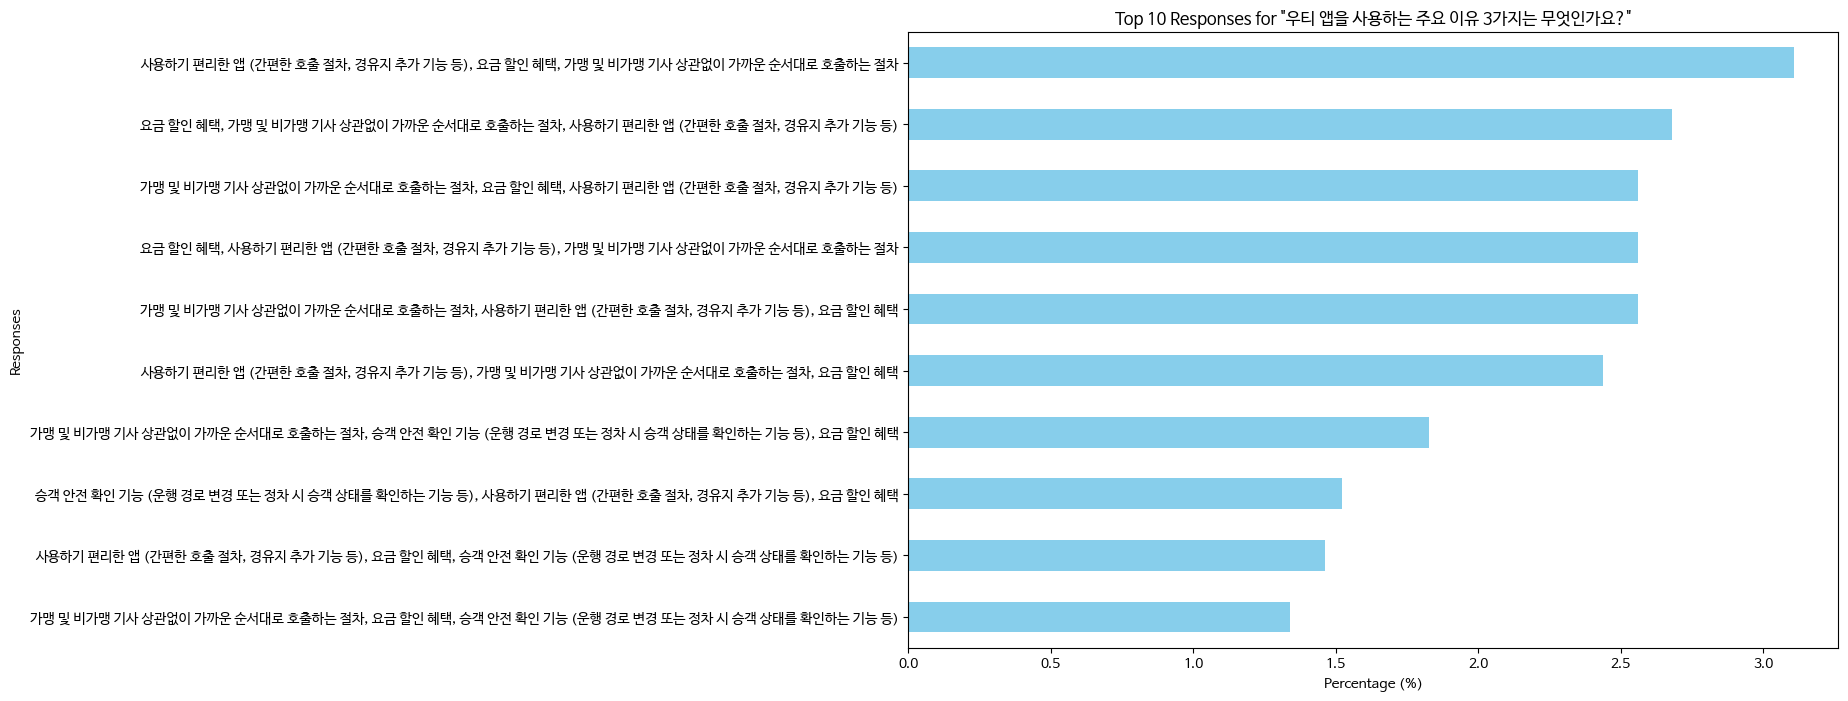

In [6]:
# Visualization for overall distribution of responses to Question 1

plt.figure(figsize=(12, 8))
overall_response_distribution.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Responses for "우티 앱을 사용하는 주요 이유 3가지는 무엇인가요?"')
plt.xlabel('Percentage (%)')
plt.ylabel('Responses')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest frequency at the top
plt.show()

In [7]:
# Calculate the distribution of responses for Question 1 based on regions
region_response_distribution = data.groupby('지역')['우티 앱을 사용하는 주요 이유 3가지는 무엇인가요?'].value_counts(normalize=True) * 100
region_response_distribution_df = region_response_distribution.reset_index(name='Percentage')
region_response_distribution_df.columns = ['Region', 'Response', 'Percentage']

# Display the top responses for each region
top_responses_by_region = region_response_distribution_df.groupby('Region').apply(lambda x: x.nlargest(1, 'Percentage')).reset_index(drop=True)
top_responses_by_region

,Region,Response,Percentage
0,경기도,"가맹 및 비가맹 기사 상관없이 가까운 순서대로 호출하는 절차, 요금 할인 혜택, 사...",2.849003
1,서울,"요금 할인 혜택, 가맹 및 비가맹 기사 상관없이 가까운 순서대로 호출하는 절차, 사...",3.059581
2,인천,"사용하기 편리한 앱 (간편한 호출 절차, 경유지 추가 기능 등), 요금 할인 혜택,...",3.587444


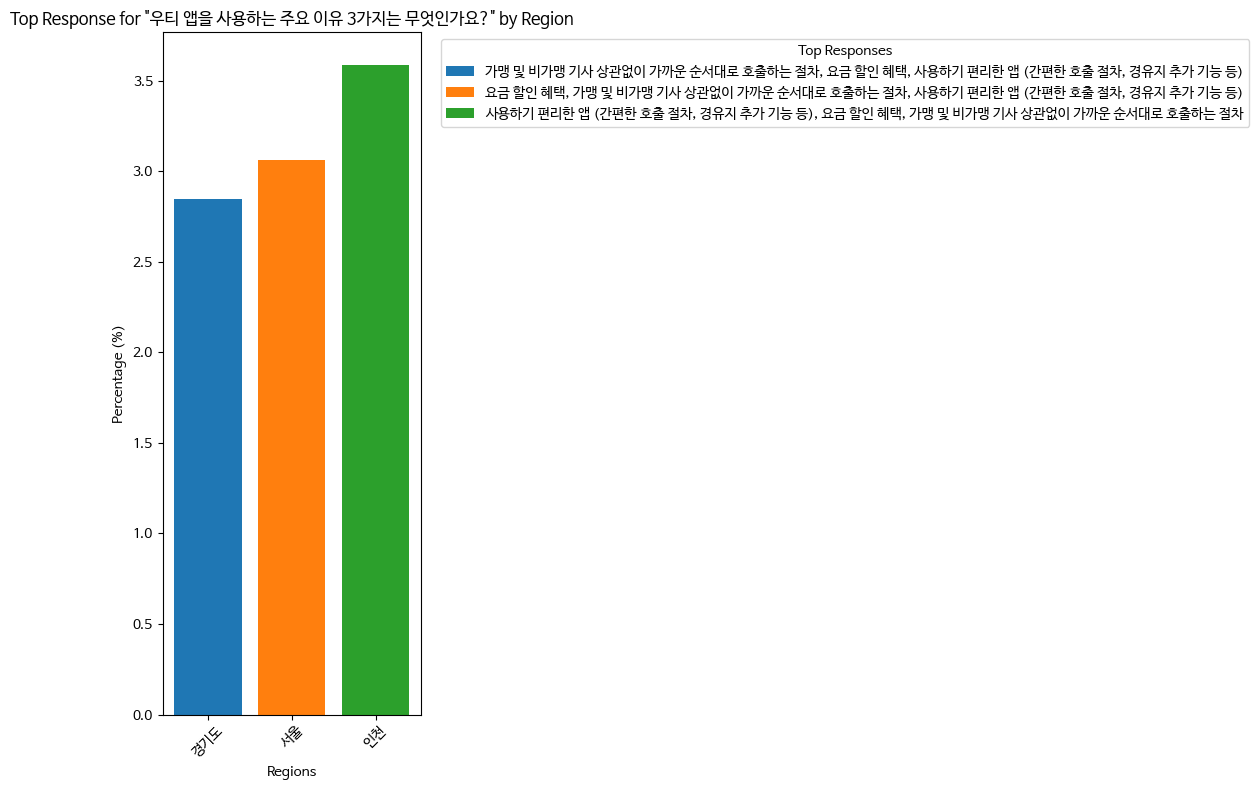

In [8]:
# Visualization for the top response distribution based on regions

plt.figure(figsize=(12, 8))
for region in top_responses_by_region['Region'].unique():
    subset = top_responses_by_region[top_responses_by_region['Region'] == region]
    plt.bar(subset['Region'], subset['Percentage'], label=subset['Response'].iloc[0])

plt.title('Top Response for "우티 앱을 사용하는 주요 이유 3가지는 무엇인가요?" by Region')
plt.xlabel('Regions')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Top Responses', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
# Calculate the distribution of responses for Question 1 based on gender and age groups
gender_age_response_distribution = data.groupby(['응답자의 성별을 무엇인가요?', '응답자의 연령대는 어느 그룹에 속하나요?'])['우티 앱을 사용하는 주요 이유 3가지는 무엇인가요?'].value_counts(normalize=True) * 100
gender_age_response_distribution_df = gender_age_response_distribution.reset_index(name='Percentage')
gender_age_response_distribution_df.columns = ['Gender', 'Age Group', 'Response', 'Percentage']

# Display the top responses for each gender and age group combination
top_responses_by_gender_age = gender_age_response_distribution_df.groupby(['Gender', 'Age Group']).apply(lambda x: x.nlargest(1, 'Percentage')).reset_index(drop=True)
top_responses_by_gender_age

,Gender,Age Group,Response,Percentage
0,남성,20대,"요금 할인 혜택, 사용하기 편리한 앱 (간편한 호출 절차, 경유지 추가 기능 등),...",4.593640
1,남성,30대,"가맹 및 비가맹 기사 상관없이 가까운 순서대로 호출하는 절차, 전 세계에서 우버를 ...",4.225352
2,남성,40대,"사용하기 편리한 앱 (간편한 호출 절차, 경유지 추가 기능 등), 요금 할인 혜택,...",5.095541
3,남성,50대,"사용하기 편리한 앱 (간편한 호출 절차, 경유지 추가 기능 등), 가맹 및 비가맹 ...",4.597701
4,남성,60대 이상,"사용하기 편리한 앱 (간편한 호출 절차, 경유지 추가 기능 등), 전 세계에서 우버...",14.285714
5,여성,20대,"가맹 및 비가맹 기사 상관없이 가까운 순서대로 호출하는 절차, 사용하기 편리한 앱 ...",3.535354
6,여성,30대,"가맹 및 비가맹 기사 상관없이 가까운 순서대로 호출하는 절차, 사용하기 편리한 앱 ...",3.647416
7,여성,40대,"가맹 및 비가맹 기사 상관없이 가까운 순서대로 호출하는 절차, 요금 할인 혜택, 사...",4.424779
8,여성,50대,승객 안전 확인 기능 (운행 경로 변경 또는 정차 시 승객 상태를 확인하는 기능 등...,7.317073
9,여성,60대 이상,"기사님의 안전한 운전, 깨끗하고 편안한 차량 내부, 사용하기 편리한 앱 (간편한 호...",12.500000


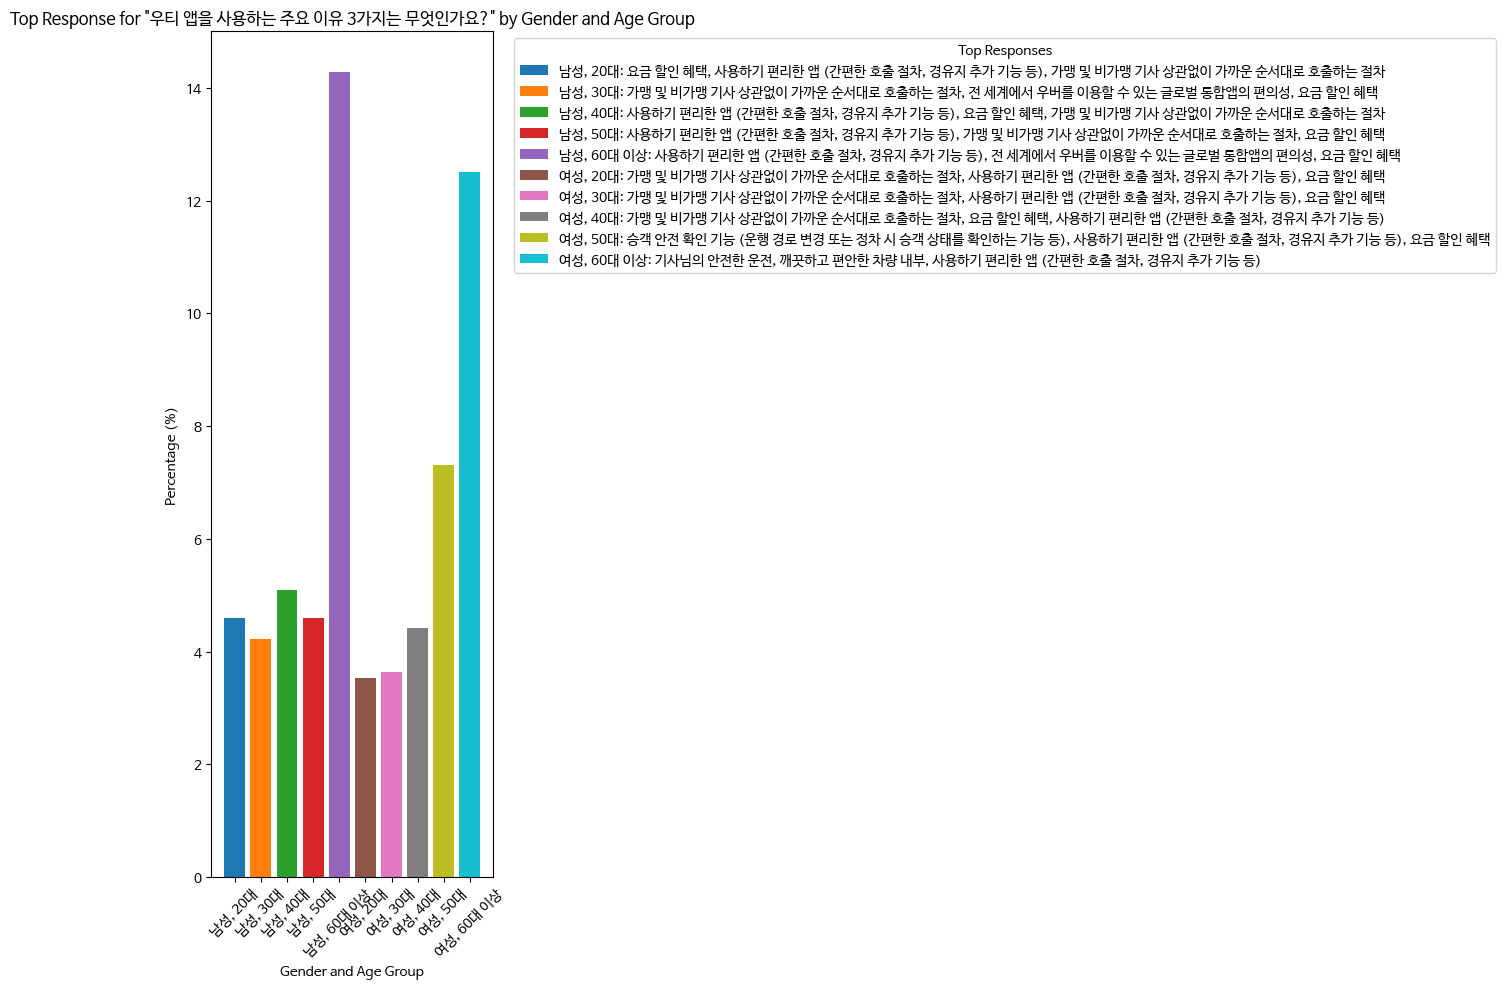

In [10]:
# Visualization for the top response distribution based on gender and age groups

plt.figure(figsize=(14, 10))
for combo in top_responses_by_gender_age[['Gender', 'Age Group']].drop_duplicates().values:
    gender, age_group = combo
    subset = top_responses_by_gender_age[(top_responses_by_gender_age['Gender'] == gender) & (top_responses_by_gender_age['Age Group'] == age_group)]
    label = f"{gender}, {age_group}: {subset['Response'].iloc[0]}"
    plt.bar(f"{gender}, {age_group}", subset['Percentage'], label=label)

plt.title('Top Response for "우티 앱을 사용하는 주요 이유 3가지는 무엇인가요?" by Gender and Age Group')
plt.xlabel('Gender and Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Top Responses', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()